# 2.5 Visual Applications of Machine Learning - Handwriting Recognition

### Table of Contents  
1. Importing Libraries  
2. Training the model on the MNIST data set  
3. Loading and Pre-processing Handwritten Data  
4. Testing with Real Data  

### 1Importing Libraries

In [77]:
# Loading Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from numpy import unique, reshape, argmax, asarray

# Use TensorFlow's bundled Keras instead of standalone Keras to avoid import errors (e.g. 'keras.layers.core' not found)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Input

from PIL import Image

In [35]:
# Sets random seed for reproducibility; ensures consistent results across runs

tf.random.set_seed(42)

In [36]:
# Loading and exploring the MNIST dataset

hand = mnist.load_data()

In [37]:
# Accessing the first item from the data

hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [38]:
(X_train, y_train), (X_test, y_test) = hand

In [55]:
np.set_printoptions(edgeitems=3)  # Limits the number of edge items shown when printing large arrays (shows 3 items at each end)
np.core.arrayprint._line_width = 180000  # Increases the maximum line width to prevent NumPy from wrapping output across multiple lines

In [40]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [49]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [51]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

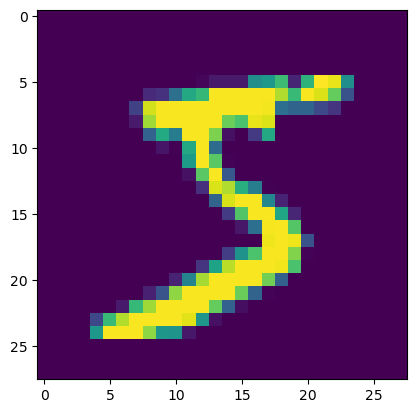

In [53]:
plt.imshow(X_train[0])

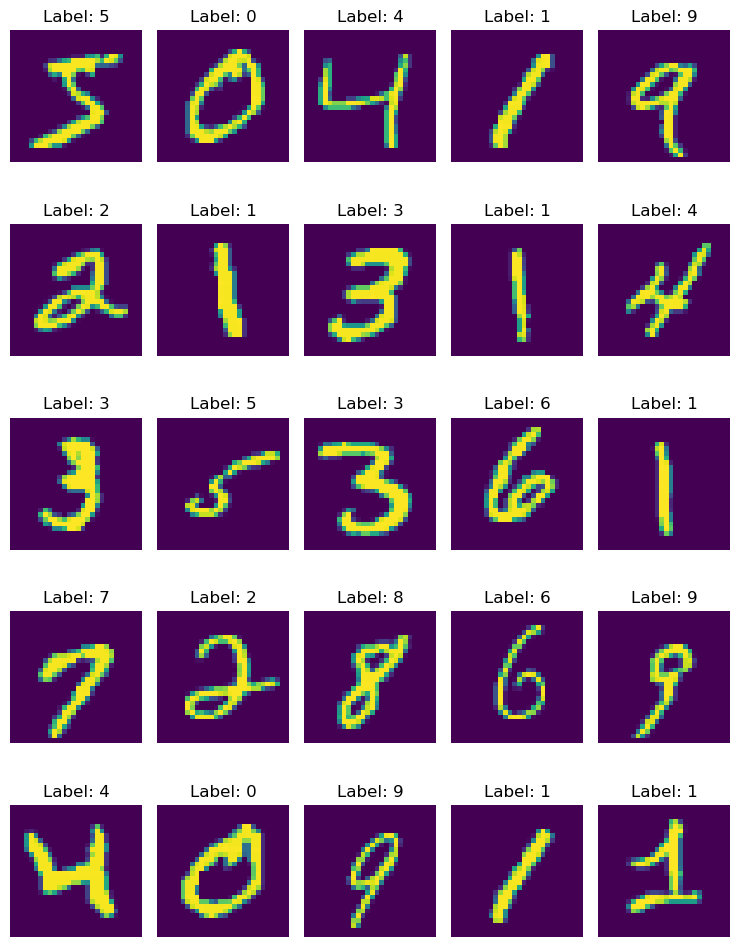

In [57]:
num = 25  # Number of images to display

images = X_train[:num]  # Select the first 25 images from the training set
labels = y_train[:num]  # Select the corresponding 25 labels

num_row = 5  # Number of rows in the plot grid
num_col = 5  # Number of columns in the plot grid

# Create a 5x5 grid of subplots to display the images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col, 2*num_row))

# Loop through each image and plot it
for i in range(num):
    ax = axes[i // num_col, i % num_col]  # Find the correct position in the grid
    ax.imshow(images[i])  # Display the image (grayscale image by default)
    ax.set_title('Label: {}'.format(labels[i]))  # Set the title to show the digit label
    ax.axis('off')  # Hide the axis ticks for cleaner look

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the full 5x5 grid of digit images

In [59]:
# 5. Preprocess input data

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)  # Reshape training images to 28x28 pixels with 1 channel (grayscale)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)    # Reshape test images similarly for CNN input compatibility

In [61]:
X_train = X_train.astype('float32')  # Convert training data to float32 for better performance in neural network computations
X_test = X_test.astype('float32')    # Convert test data to float32 for consistency and efficiency

In [63]:
X_train /= 255  # Normalize pixel values to range [0, 1] for training stability (original range is 0–255)
X_test /= 255   # Normalize test data the same way to match training conditions

In [67]:
# 6. Preprocess class labels

# ERROR FIXED: 'NameError: name 'np_utils' is not defined' occurred because np_utils is deprecated or not imported in tensorflow.keras
# FIX: Use to_categorical from tensorflow.keras.utils instead

Y_train = to_categorical(y_train, 10)  # Convert training labels to one-hot encoding (e.g., '3' → [0,0,0,1,0,0,0,0,0,0])
Y_test = to_categorical(y_test, 10)    # Convert test labels similarly

In [69]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [71]:
# Loop through the first 10 training labels and print their one-hot encoded versions

for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)  # Convert from float32 to int32 for cleaner printing
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


### 2 Model Training

In [79]:
# Set training parameters

epochs = 30              # Number of training cycles over the entire dataset
batch_size = 16          # Number of samples per training batch
n_hidden = 32            # Not used here, but could define units in hidden layers if needed

# Note: timesteps/input_dim/n_classes are commented out and not needed for CNN-based image classification

# 7. Define model architecture
model = Sequential()  # Initialize a sequential neural network

# First convolutional layer: 32 filters, 3x3 kernel, ReLU activation, input shape for MNIST (28x28x1)
model.add(Input(shape=(28,28,1)))  # Explicit input layer
model.add(Conv2D(32, (3,3), activation='relu'))

# Second convolutional layer: more feature extraction
model.add(Conv2D(32, (3,3), activation='relu'))

# Downsample with max pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Dropout to prevent overfitting (randomly sets 25% of inputs to 0)
model.add(Dropout(0.25))

# Flatten the 2D feature maps to a 1D feature vector for the dense layers
model.add(Flatten())

# Fully connected layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Additional dropout to reduce overfitting
model.add(Dropout(0.5))

# Output layer with 10 units (one per digit) and softmax to give probabilities
model.add(Dense(10, activation='softmax'))

# 8. Compile model: define loss function, optimizer, and evaluation metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Categorical crossentropy for multi-class classification

In [81]:
# 9. Fit model on training data

model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)  # Train the model for 10 epochs with batches of 32 samples; verbose=1 shows progress

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8746 - loss: 0.3896
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9752 - loss: 0.0836
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9801 - loss: 0.0636
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9843 - loss: 0.0527
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9867 - loss: 0.0425
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9886 - loss: 0.0381
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9895 - loss: 0.0348
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9900 - loss: 0.0306
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9911 - loss: 0.0294
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9912 - loss: 0.0266


In [83]:
# 10. Evaluate model on test data

score = model.evaluate(X_test, Y_test, verbose=2)  # Evaluate model performance on unseen test data; returns loss and accuracy

313/313 - 2s - 6ms/step - accuracy: 0.9922 - loss: 0.0278


### Evaluation Output Explained:

- **313/313**: Number of batches (32 samples each) the model evaluated over the test set  
- **2s**: Total time it took to evaluate the test data  
- **6ms/step**: Average time per batch  
- **accuracy: 0.9922** → **99.22% accuracy** on unseen test data 
- **loss: 0.0278** → **Very low prediction error**, meaning the model is highly confident and mostly correct

In [87]:
# Predict the class probabilities for the first 4 images in the test set

model.predict(X_test[:4])  # Returns an array of 4 probability distributions (one per digit class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[1.77658046e-14, 1.11511389e-09, 1.19502498e-12, 1.87821113e-11,
        4.94667621e-13, 2.66741094e-14, 1.88277507e-17, 1.00000000e+00,
        1.46810068e-13, 2.76416223e-10],
       [4.88190322e-11, 2.70992597e-08, 1.00000000e+00, 4.21622887e-13,
        3.57382179e-12, 1.41209339e-16, 4.09727985e-09, 3.69835835e-13,
        5.80680773e-12, 2.94147305e-16],
       [1.07580394e-12, 1.00000000e+00, 4.23722030e-10, 6.07040947e-13,
        8.03439626e-09, 7.21588789e-09, 5.58744717e-10, 2.35057351e-09,
        4.12125578e-09, 1.94181932e-12],
       [9.99991655e-01, 6.77445773e-12, 1.03053885e-08, 4.16092811e-12,
        9.32841027e-10, 3.13507137e-11, 8.33642207e-06, 7.02403543e-12,
        3.88077598e-10, 9.30371169e-10]], dtype=float32)

##### The highest value is 1.00 at index 7, which means the model predicts this image is a 7 with very high confidence.

In [90]:
# Predict class probabilities for the first 4 test images
# Then sum the probabilities across all 10 digit classes for each image

sumarray = np.sum(model.predict(X_test[:4]), axis=1)  # Each row should sum to ~1.0 due to softmax output
sumarray  # Display the summed values to verify proper probability normalization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([1., 1., 1., 1.], dtype=float32)

##### Output confirms that each prediction is a valid probability distribution.
##### All rows sum to 1.0 as expected with softmax activation in the final layer.

In [93]:
# Actual results (ground truth labels) for the first 4 images in the test set

y_test[:4]  # These are the correct digit labels (0–9) before one-hot encoding

array([7, 2, 1, 0], dtype=uint8)

The actual digits for the first 4 images in the test set are:

- **Image 1 → 7**
- **Image 2 → 2**
- **Image 3 → 1**
- **Image 4 → 0**

In [96]:
# Predict class probabilities for the entire test set

test_predictions = model.predict(X_test)

# Create a confusion matrix:
# - y_test contains the true labels
# - np.argmax(test_predictions, axis=1) gets the predicted class for each image

cm = confusion_matrix(y_test, np.argmax(test_predictions, axis=1))

# Print the confusion matrix
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   2    1 1023    0    0    0    1    4    1    0]
 [   0    0    1 1000    0    6    0    1    1    1]
 [   0    0    1    0  973    0    3    0    3    2]
 [   1    0    0    3    0  884    3    1    0    0]
 [   2    2    0    0    1    1  951    0    1    0]
 [   0    3    5    0    0    0    0 1019    1    0]
 [   1    0    1    1    0    0    0    1  969    1]
 [   0    0    0    3    3    1    0    1    5  996]]


#### Confusion Matrix Interpretation

Each row = actual digit (ground truth)  
Each column = predicted digit by the model  

Diagonal values = correct predictions  
Off-diagonal values = misclassifications  

#### Example Highlights:
- Digit **0**: 975 correctly predicted, a few misclassified as 1, 6, 8, 9
- Digit **1**: 1132 correct, very few errors — excellent performance
- Digit **2**: 1023 correct, with a couple misclassified as 0, 4
- Digit **8**: 969 correct, 5 confused with 5, 1 with 6 — small mix-ups

Overall: most predictions are on the diagonal → **very high accuracy**, especially strong on digits 1, 4, 6, 9.

### 3.Loading and Pre-processing Handwritten Data

In [103]:
# Base path to folder containing digit images

path = r"C:\Users\wallm\OneDrive\Desktop\01 CareerFoundry & Datafiles\7.1 - Machine Learning for Analysts - Python\2.5 Visual Applications of Machine Learning"

In [137]:
# Import the 0 image

img0 = Image.open(os.path.join(path, '0.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [139]:
img0

In [119]:
testimg = asarray(img0)

In [121]:
print(testimg.shape)

(28, 28)


In [123]:
testimg = testimg.reshape(1, 28, 28, 1)

In [125]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
0


##### Correctly predicted a 0

In [167]:
# Import the 1 image

img1 = Image.open(os.path.join(path, '1.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [169]:
img1

In [149]:
testimg = asarray(img1)

In [151]:
print(testimg.shape)

(28, 28)


In [153]:
testimg = testimg.reshape(1, 28, 28, 1)

In [155]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
7


##### Incorrectly predicted a 7 instead of 1 - albeit my 1s do look a bit like 7s :-)

In [163]:
# Import the 2 image

img2 = Image.open(os.path.join(path, '2.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [165]:
img2

In [171]:
testimg = asarray(img2)

In [173]:
print(testimg.shape)

(28, 28)


In [175]:
testimg = testimg.reshape(1, 28, 28, 1)

In [177]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2


##### Correctly predicted a 2

In [180]:
# Import the 3 image

img3 = Image.open(os.path.join(path, '3.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [182]:
img3

In [184]:
testimg = asarray(img3)

In [186]:
print(testimg.shape)

(28, 28)


In [188]:
testimg = testimg.reshape(1, 28, 28, 1)

In [190]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
3


##### Correctly predicted a 3

In [194]:
# Import the 4 image

img4 = Image.open(os.path.join(path, '4.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [196]:
img4

In [198]:
testimg = asarray(img4)

In [200]:
print(testimg.shape)

(28, 28)


In [202]:
testimg = testimg.reshape(1, 28, 28, 1)

In [204]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4


##### Correctly predicted a 4

In [208]:
# Import the 5 image

img5 = Image.open(os.path.join(path, '5.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [210]:
img5

In [212]:
testimg = asarray(img5)

In [215]:
print(testimg.shape)

(28, 28)


In [217]:
testimg = testimg.reshape(1, 28, 28, 1)

In [219]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
8


##### Incorrectly predicted an 8 instead of 5 - Interesting

In [223]:
# Import the 6 image

img6 = Image.open(os.path.join(path, '6.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [225]:
img6

In [227]:
testimg = asarray(img6)

In [229]:
print(testimg.shape)

(28, 28)


In [231]:
testimg = testimg.reshape(1, 28, 28, 1)

In [233]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3


##### Incorrectly predicted an 3 instead of 6!

In [239]:
# Import the 7 image

img7 = Image.open(os.path.join(path, '7.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [241]:
img7

In [243]:
testimg = asarray(img7)

In [245]:
print(testimg.shape)

(28, 28)


In [247]:
testimg = testimg.reshape(1, 28, 28, 1)

In [249]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2


##### Incorrectly predicted an 2 instead of 7!!!

In [255]:
# Import the 8 image

img8 = Image.open(os.path.join(path, '8.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [257]:
img8

In [259]:
testimg = asarray(img8)

In [261]:
print(testimg.shape)

(28, 28)


In [263]:
testimg = testimg.reshape(1, 28, 28, 1)

In [265]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
8


##### Correctly predicted a 8

In [271]:
# Import the 9 image

img9 = Image.open(os.path.join(path, '9.png')) #<--FILL IN THIS VALUE!
print(img.format)
print(img.size)
print(img.mode)

PNG
(28, 28)
L


In [273]:
img9

In [277]:
testimg = asarray(img9)

In [279]:
print(testimg.shape)

(28, 28)


In [281]:
testimg = testimg.reshape(1, 28, 28, 1)

In [283]:
# predict the class

predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
7


##### Incorrectly predicted an 7 instead of 9!!!

### Final Results Summary

**Results were:**

- Correctly recognised: `0`, `2`, `3`, `4`, `8`  = 50% success rate
- Incorrect predictions:
  - `1` → **7**
  - `5` → **8**
  - `6` → **3**
  - `7` → **2**
  - `9` → **7**

**Conclusion:**  
These results might say something about ** the model's training**!  
Either way, it's a great reminder that even high-performing models can struggle with human variation. 